## Importing Dependencies


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Data Collection and Analysis

Heart Disease Dataset

In [2]:
heart_dataset = pd.read_csv('heart.csv')

In [3]:
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#looking at the size
heart_dataset.shape

(303, 14)

In [5]:
#statiscal features
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
x =heart_dataset['target'].value_counts()

In [7]:
x

target
1    165
0    138
Name: count, dtype: int64

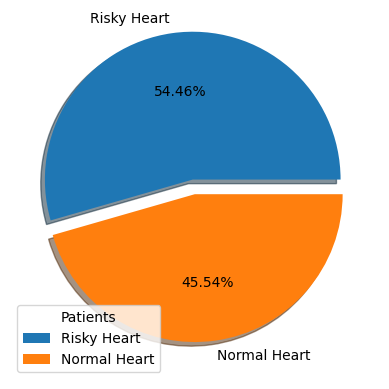

In [8]:
labels = {'Risky Heart':1,'Normal Heart':2}
plt.pie(x,labels=labels,shadow=True,autopct='%1.2f%%',explode=[0.1,0])
plt.legend(title="Patients")
plt.show()

**Output Class Labels**

>0 -> Normal Heart

>1 -> Risky Heart

In [9]:
heart_dataset.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [10]:
#separating data and labels
X = heart_dataset.drop(columns = 'target',axis=1)
Y = heart_dataset['target']

In [11]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


##Train Test Split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, stratify=Y, random_state=2 )

In [14]:
print(X.shape,X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Training the Model

 Logistic Regression

In [15]:

classifier = LogisticRegression()

In [16]:
#training the Logistic Regression Classifier
classifier.fit(X_train, Y_train)

c:\Users\91989\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model Evaluation

Accuray Score

In [18]:
#on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy of the training data is:', training_data_accuracy)

Accuracy of the training data is: 0.8512396694214877


In [20]:
#on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy of the test data is:', test_data_accuracy)

Accuracy of the test data is: 0.819672131147541


## Making a Predictive System

In [22]:
patient_details = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
patient_details_as_numpy_array = np.asarray(patient_details)
patient_details_reshaped = patient_details_as_numpy_array.reshape(1,-1)


prediction = classifier.predict(patient_details_reshaped)
print(prediction)

if (prediction[0]==0):
  print('The person has normal heart.')
else:
  print('The person has defected heart.')

[0]
The person has normal heart.


c:\Users\91989\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Saving the Model

In [19]:
import pickle

In [20]:
filename = 'heart_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [21]:
loaded_model = pickle.load(open('heart_model.sav','rb'))